In [7]:
import pandas as pd
import numpy as np
import plotly.express as px

In [8]:
# Si la base de données n'est pas déjà téléchargée
# df0 = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/3004168d-bec4-44d9-a781-ef16f41856a2', sep = '|')

# Sinon
df0 = pd.read_csv('valeursfoncieres-2019.txt', sep = '|')


# I. Traitement de la base de données

In [9]:
df1 = df0.copy()

# Option d'affchage
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df1.sample(5)

Code service CH  Reference document  1 Articles CGI  2 Articles CGI  \
1261987              NaN                 NaN             NaN             NaN   
2412467              NaN                 NaN             NaN             NaN   
1324814              NaN                 NaN             NaN             NaN   
2230739              NaN                 NaN             NaN             NaN   
873909               NaN                 NaN             NaN             NaN   

         3 Articles CGI  4 Articles CGI  5 Articles CGI  No disposition  \
1261987             NaN             NaN             NaN               1   
2412467             NaN             NaN             NaN               1   
1324814             NaN             NaN             NaN               1   
2230739             NaN             NaN             NaN               1   
873909              NaN             NaN             NaN               1   

        Date mutation Nature mutation Valeur fonciere  No voie B/T/Q  \
1261987    27/09/2019           Vente       173388,00      NaN   NaN   
2412467    06/11/2019           Vente      1395000,00     48.0   NaN   
1324814    03/01/2019           Vente        75000,00   5197.0     A   
2230739    28/11/2019           Vente       146000,00      8.0     A   
873909     05/03/2019           Vente        32000,00      NaN   NaN   

        Type de voie Code voie                 Voie  Code postal  \
1261987          RUE      0010  DE L ABBAYE TORIGNY      50160.0   
2412467          RUE      8570        DE STRASBOURG      94300.0   
1324814          NaN      B904          LA PILLIERE      53940.0   
2230739           SQ      0464          ELIE RECLUS      91000.0   
873909           NaN      B082           LA COUDREE      37230.0   

                    Commune Code departement  Code commune  \
1261987  TORIGNY-LES-VILLES               50           601   
2412467           VINCENNES               94            80   
1324814             AHUILLE               53             1   
2230739  EVRY-COURCOURONNES               91           228   
873909               LUYNES               37           139   

         Prefixe de section Section  No plan No Volume 1er lot  \
1261987                 NaN      AB       42       NaN     NaN   
2412467                 NaN       D       40       NaN       1   
1324814                 NaN       C     1005       NaN     NaN   
2230739                 NaN      AK       20       NaN      30   
873909                  NaN      AC      158       NaN     NaN   

        Surface Carrez du 1er lot 2eme lot Surface Carrez du 2eme lot  \
1261987                       NaN      NaN                        NaN   
2412467                    204,23      NaN                        NaN   
1324814                       NaN      NaN                        NaN   
2230739                    105,44      NaN                        NaN   
873909                        NaN      NaN                        NaN   

        3eme lot Surface Carrez du 3eme lot  4eme lot  \
1261987      NaN                        NaN       NaN   
2412467      NaN                        NaN       NaN   
1324814      NaN                        NaN       NaN   
2230739      NaN                        NaN       NaN   
873909       NaN                        NaN       NaN   

        Surface Carrez du 4eme lot  5eme lot Surface Carrez du 5eme lot  \
1261987                        NaN       NaN                        NaN   
2412467                        NaN       NaN                        NaN   
1324814                        NaN       NaN                        NaN   
2230739                        NaN       NaN                        NaN   
873909                         NaN       NaN                        NaN   

         Nombre de lots  Code type local  \
1261987               0              NaN   
2412467               1              4.0   
1324814               0              1.0   
2230739               1              1.0   
873909      

## 1. Séléction des variables intéressantes

In [10]:
df1.columns

Index([&#39;Code service CH&#39;, &#39;Reference document&#39;, &#39;1 Articles CGI&#39;,
       &#39;2 Articles CGI&#39;, &#39;3 Articles CGI&#39;, &#39;4 Articles CGI&#39;, &#39;5 Articles CGI&#39;,
       &#39;No disposition&#39;, &#39;Date mutation&#39;, &#39;Nature mutation&#39;, &#39;Valeur fonciere&#39;,
       &#39;No voie&#39;, &#39;B/T/Q&#39;, &#39;Type de voie&#39;, &#39;Code voie&#39;, &#39;Voie&#39;, &#39;Code postal&#39;,
       &#39;Commune&#39;, &#39;Code departement&#39;, &#39;Code commune&#39;, &#39;Prefixe de section&#39;,
       &#39;Section&#39;, &#39;No plan&#39;, &#39;No Volume&#39;, &#39;1er lot&#39;,
       &#39;Surface Carrez du 1er lot&#39;, &#39;2eme lot&#39;, &#39;Surface Carrez du 2eme lot&#39;,
       &#39;3eme lot&#39;, &#39;Surface Carrez du 3eme lot&#39;, &#39;4eme lot&#39;,
       &#39;Surface Carrez du 4eme lot&#39;, &#39;5eme lot&#39;, &#39;Surface Carrez du 5eme lot&#39;,
       &#39;Nombre de lots&#39;, &#39;Code type local&#39;, &#39;Type local&#

In [11]:
df = df1[[
        'Date mutation', 'Nature mutation', 'Valeur fonciere',
        'No voie', 'Type de voie', 'Code voie', 'Voie', 'Code postal',
        'Commune', 'Code departement', 'Code commune', 'Type local',
        'Surface reelle bati', 'Nombre pieces principales', 'Surface terrain'
        ]]

df.sample(5)

Date mutation                     Nature mutation Valeur fonciere  \
443160     23/12/2019                               Vente       104000,00   
440465     07/06/2019                               Vente       114600,00   
1444955    19/09/2019                               Vente       175000,00   
865948     16/02/2019                               Vente        35000,00   
1885992    18/10/2019  Vente en l&#39;état futur d&#39;achèvement       167042,00   

         No voie Type de voie Code voie                Voie  Code postal  \
443160       NaN          NaN      C800  LE PRE DU RUISSEAU      22150.0   
440465      10.0          NaN      D865      LA VILLE ERMEL      22330.0   
1444955     32.0          RUE      1567       CHARLES QUINT      59800.0   
865948       5.0          RTE      0075   DE SAINT VALENTIN      36150.0   
1885992      NaN          RUE      0006             ABELARD      77100.0   

                       Commune Code departement  Code commune  Type local  \
443160     PLOUGUENAST-LANGAST               22           219         NaN   
440465                 LE MENE               22            46      Maison   
1444955                  LILLE               59           350  Dépendance   
865948   MENETREOLS-SOUS-VATAN               36           116      Maison   
1885992                  MEAUX               77           284         NaN   

         Surface reelle bati  Nombre pieces principales  Surface terrain  
443160                   NaN                        NaN           1880.0  
440465                  64.0                        3.0           1000.0  
1444955                  0.0                        0.0              NaN  
865948                  47.0                        2.0            792.0  
1885992                  NaN                        NaN              NaN

### Premier tri pour garder les biens qui nous intéressent dans le cadre que l'on s'est donné

In [12]:
df = df[df['Nature mutation'] == 'Vente']
df = df[df['Code departement'] == 75]
df = df[df['Type local'] == 'Appartement']
df = df[pd.isna(df['Surface terrain'])] # Vu qu'on va essayer de prédir un prix au m2, la surface est une donnée indispensable

### Changement du nom des variables

In [13]:
df = df[[
        'Date mutation', 'Valeur fonciere', 'No voie', 
        'Type de voie', 'Voie', 'Code postal', 'Surface reelle bati', 
        'Nombre pieces principales',
        'Code departement', 'Code commune', 'Code voie',
        'Type local'
        ]]

df = df.rename(columns = {
                            'Date mutation': 'Date', 
                            'Valeur fonciere': 'Valeur',
                            'Type de voie': 'TypeVoie',
                            'No voie': 'Numero',
                            'Code postal': 'CodePostal',
                            'Surface reelle bati': 'Surface',
                            'Nombre pieces principales': 'NbPieces',
                            'Surface terrain': 'SurfaceTerrain',
                            'Code departement': 'Code_departement', 
                            'Code commune': 'Code_commune', 
                            'Code voie': 'Code_voie',
                            'Type local': 'TypeLocal'
                         }
              )

## 2. Gestion des variables

In [14]:
df.dtypes

Date                 object
Valeur               object
Numero              float64
TypeVoie             object
Voie                 object
CodePostal          float64
Surface             float64
NbPieces            float64
Code_departement     object
Code_commune          int64
Code_voie            object
TypeLocal            object
dtype: object

On remarque que la variable "Valeur" n'est pas de type float ou int, il va falloir y remédier !

### Valeur

In [15]:
# Les biens dont la valeur n'est pas renseignée ne nous intéressent pas
df = df.dropna(subset = ['Valeur'])

# Changement des virgules en point pour pouvoir convertir les types str en types float
df['Valeur'] = df.apply(lambda row : str(row.Valeur).replace(',', '.'), axis = 1)
df['Valeur'] = pd.to_numeric(df['Valeur'])

# On divise par 1000 les prix pour plus de lisibilité
df['Valeur'] = df['Valeur']/1000

# On se concentre sur une tranche de prix "raisonnable"
df = df[df['Valeur'] > 60]
df = df[df['Valeur'] < 15000]

# Pour déterminer ces bornes, nous sommes allé sur des sites d'immobiliers à Paris pour trouver les valeurs extrêmes

### Surface

Un logement mis en location doit respecter une surface minimum. Il s'agit d'un des critères de décence du logement.

Le logement doit comporter au moins une pièce principale présentant :

une surface habitable de 9 m² et une hauteur sous plafond minimale de 2,20 mètres,
ou un volume habitable de 20 m³.

In [16]:
df = df[df['Surface'] >= 9]

### Création de la variable du prix par metre carré (prixm2)

In [17]:
df['prixm2'] = df['Valeur'] / df['Surface']

### Date

In [18]:
display(df.sort_values('Date')[['Date']].head())
df[pd.isna(df['Date'])].shape

# Il ne semble pas y avoir de valeurs manquantes

Date
2519832  01/02/2019
2478301  01/02/2019
2482940  01/02/2019
2482948  01/02/2019
2482963  01/02/2019

(0, 13)

### Elements d'adresse (Numero, TypeVoie,  Voie, CodePostal)

In [19]:
# Numero
print(df[pd.isna(df['Numero'])].shape)

# Tous les appartments ont un numéro indiqué. On est satisfait car on souhaite une localisation précise des appartements

(0, 13)


In [20]:
# TypeVoie

print(df[pd.isna(df['TypeVoie'])].shape)

# 15 valeurs manquantes, on regarde à quoi elles correspondent

display(df[pd.isna(df['TypeVoie'])])

# Cela correspond à des adresses où le type de voie est spécial (Villa, Pont, Autoroute, Rond point) 
# et est contenu dans la variable Voie
# On laisse comme ca

(15, 13)


Date  Valeur  Numero TypeVoie                        Voie  \
2478666  28/02/2019  429.70    30.0      NaN     VIL WAGRAM SAINT HONORE   
2495603  03/06/2019  896.60     3.0      NaN                        N 11   
2500112  03/07/2019  217.00     4.0      NaN        ALLEE DES HORTENSIAS   
2501436  14/02/2019  339.70     3.0      NaN  VLA HONORE GABRIEL RIQUETI   
2501524  13/02/2019  250.00     6.0      NaN        VIL DU MONT TONNERRE   
2501686  13/02/2019  970.00     7.0      NaN            DU PONT MIRABEAU   
2502474  15/04/2019  309.06     3.0      NaN        VIL DU MONT TONNERRE   
2503541  10/05/2019  856.00  9003.0      NaN             METRO BOUCICAUT   
2504640  12/07/2019  860.00     7.0      NaN  VLA HONORE GABRIEL RIQUETI   
2504703  16/07/2019  570.00   158.0      NaN           R-PTSAINT CHARLES   
2505389  27/08/2019  922.33     7.0      NaN            DU PONT MIRABEAU   
2505447  12/09/2019  794.00    10.0      NaN  VLA HONORE GABRIEL RIQUETI   
2505729  18/09/2019   65.00     7.0      NaN            DU PONT MIRABEAU   
2506481  08/11/2019  918.00     7.0      NaN            DU PONT MIRABEAU   
2527197  27/03/2019  731.40     4.0      NaN                        Z 20   

         CodePostal  Surface  NbPieces Code_departement  Code_commune  \
2478666     75008.0     41.0       1.0               75           108   
2495603     75011.0    100.0       3.0               75           111   
2500112     75014.0     18.0       1.0               75           114   
2501436     75015.0     31.0       1.0               75           115   
2501524     75015.0     25.0       1.0               75           115   
2501686     75015.0    120.0       4.0               75           115   
2502474     75015.0     21.0       2.0               75           115   
2503541     75015.0     78.0       4.0               75           115   
2504640     75015.0     80.0       3.0               75           115   
2504703     75015.0     70.0       2.0               75           115   
2505389     75015.0    110.0       4.0               75           115   
2505447     75015.0     67.0       2.0               75           115   
2505729     75015.0      9.0       1.0               75           115   
2506481     75015.0     95.0       3.0               75           115   
2527197     75020.0     85.0       4.0               75           120   

        Code_voie    TypeLocal     prixm2  
2478666      9936  Appartement  10.480488  
2495603      X421  Appartement   8.966000  
2500112      R072  Appartement  12.055556  
2501436      4648  Appartement  10.958065  
2501524      6539  Appartement  10.000000  
2501686      7616  Appartement   8.083333  
2502474      6539  Appartement  14.717143  
2503541      S049  Appartement  10.974359  
2504640      4648  Appartement  10.750000  
2504703      8512  Appartement   8.142857  
2505389      7616  Appartement   8.384818  
2505447      4648  Appartement  11.850746  
2505729      7616  Appartement   7.222222  
2506481      7616  Appartement   9.663158  
2527197      X670  Appartement   8.604706

In [21]:
# Voie
display(df.sort_values('Voie')[['Voie']].head())
print(df[pd.isna(df['Voie'])].shape)

# Il ne semble pas y avoir de valeurs manquantes

Voie
2493978             A 11
2528149            AB 20
2532159            AB 20
2494739             ABEL
2497687  ABEL HOVELACQUE

(0, 13)


In [22]:
# CodePostal

print(df[pd.isna(df['CodePostal'])].shape)

# 1 valeur manquante, on regarde à quoi elle correspond

display(df[pd.isna(df['CodePostal'])])

# La rue de l'Abbé Groult se situe dans le 15ème, on remplit à la main

df.at[2503844, 'CodePostal'] = float(75015)

display(df.loc[[2503844]])

(1, 13)


Date  Valeur  Numero TypeVoie              Voie  CodePostal  \
2503844  23/05/2019   150.0    23.0      RUE  DE L ABBE GROULT         NaN   

         Surface  NbPieces Code_departement  Code_commune Code_voie  \
2503844     19.0       1.0               75           115      0012   

           TypeLocal    prixm2  
2503844  Appartement  7.894737

Date  Valeur  Numero TypeVoie              Voie  CodePostal  \
2503844  23/05/2019   150.0    23.0      RUE  DE L ABBE GROULT     75015.0   

         Surface  NbPieces Code_departement  Code_commune Code_voie  \
2503844     19.0       1.0               75           115      0012   

           TypeLocal    prixm2  
2503844  Appartement  7.894737

### NbPieces (nombre de pièces)

In [23]:
print(df[pd.isna(df['NbPieces'])].shape)

display(df.sort_values('NbPieces')[['NbPieces']].head())

# Pas de valeurs manquantes mais des appartements à 0 pièces...

display(df[df['NbPieces'] == 0].head())

# Les entrées n'ont pas l'air des anomalies, la valeur doit être manquante, on laisse tel quel en gardant à l'esprit cette observation

(0, 13)


NbPieces
2483400       0.0
2490090       0.0
2515185       0.0
2499758       0.0
2509412       0.0

Date  Valeur  Numero TypeVoie             Voie  CodePostal  \
2479736  17/06/2019  346.75    10.0      RUE  SAINTE ANASTASE     75003.0   
2480202  12/07/2019  120.00    17.0       BD     SAINT MARTIN     75003.0   
2480249  02/07/2019  342.50    22.0      RUE      DE PICARDIE     75003.0   
2482477  17/12/2019  774.60     6.0      RUE  SAINT FLORENTIN     75001.0   
2483400  12/03/2019  169.85    54.0      RUE   HENRI BARBUSSE     75005.0   

         Surface  NbPieces Code_departement  Code_commune Code_voie  \
2479736     29.0       0.0               75           103      8531   
2480202     18.0       0.0               75           103      8692   
2480249     12.0       0.0               75           103      7395   
2482477     18.0       0.0               75           101      8611   
2483400     31.0       0.0               75           105      4535   

           TypeLocal     prixm2  
2479736  Appartement  11.956897  
2480202  Appartement   6.666667  
2480249  Appartement  28.541667  
2482477  Appartement  43.033333  
2483400  Appartement   5.479032

#### Création de la variable 'id' qui permettra d'identifier l'adresse précise dans une autre bdd

In [24]:
def code_numero(numero):
    """Créé le code utilisé pour identifier le numero d'une rue au sein du code 'id' 

    Argument :
    numero : float
        numero de la rue tel que présent dans la base de données

    Return :
    code : str
        Le code correspondant (format 00007 pour le numéro 7 d'une rue, par exemple)
    """

    code = str(int(numero))
    code = '0' * (5 - len(code)) + code

    return code

df['id'] = df['Code_departement'].astype(str) + df['Code_commune'].astype(str) + '_' + df['Code_voie'].astype(str) + '_' + df['Numero'].apply(code_numero)

df = df.drop(columns = ['Code_commune', 'Code_departement', 'Code_voie'])

# Vérification

df.head(5)

Date   Valeur  Numero TypeVoie             Voie  CodePostal  \
2478017  04/01/2019  1196.00    17.0      RUE           DUPHOT     75001.0   
2478018  03/01/2019  1570.49    13.0      RUE      DE THORIGNY     75003.0   
2478022  10/01/2019   230.00     4.0      RUE          BLONDEL     75003.0   
2478024  05/01/2019   955.75    82.0       BD      MALESHERBES     75008.0   
2478025  07/01/2019   506.80     4.0     CITE  DUPETIT THOUARS     75003.0   

         Surface  NbPieces    TypeLocal     prixm2                id  
2478017    112.0       3.0  Appartement  10.678571  75101_2999_00017  
2478018    104.0       3.0  Appartement  15.100865  75103_9298_00013  
2478022     26.0       1.0  Appartement   8.846154  75103_1021_00004  
2478024     80.0       3.0  Appartement  11.946875  75108_5951_00082  
2478025     45.0       2.0  Appartement  11.262222  75103_2996_00004

In [25]:
# Petite sauvegadre de la base à ce stade

dfv0 = df.copy()

## 3. Choix de la variable à prédir

&lt;matplotlib.axes._subplots.AxesSubplot at 0x7fb9fde9a450&gt;

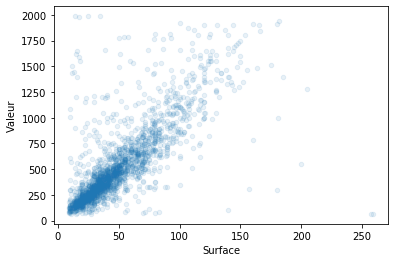

In [26]:
# On peut tracer le prix en fonction de la surface

df[df['Valeur'] < 2000].sample(2000).plot(x = 'Surface', y = 'Valeur', kind = 'scatter', alpha = .1)
# On a tracé le graphe pour les appartements ayant un prix inférieur à 2 millions

On voit une relation linéaire apparaitre, justifiée par un coefficient de corrélation significatif, de 0.58 

In [27]:
df['Valeur'].corr(df['Surface'])

0.5773341774970066

#### On fait donc l'hypothèse qu'il y a une corélation linéaire entre le prix d'un appartement et sa surface en m2.
#### On se donnera donc pour objectif de prédir le prix au m2 d'un appartement en fonction de différents paramètres.

## 4. Gestion des anomalies

La base de données n'est pas parfaite, certaines entrées sont erronées.
La premier nettoyage que nous allons faire, qui est aussi le plus grossier, est de se restreindre à des prix au m2 raisonnables.
#### Le site meilleursagents.com recense les prix au m2 de nombreux appartements à Paris. 
#### Les prix les plus bas observé sont environ de 4 700 €/m2
#### Les prix les plus hauts observés sont environ de 32 000 €/m2

#### On choisit donc de considérer les biens dont le prix au m2 est compris entre 4 230 € et 35 200 (marge de 10%)

&lt;matplotlib.axes._subplots.AxesSubplot at 0x7fb9fe4ccb10&gt;

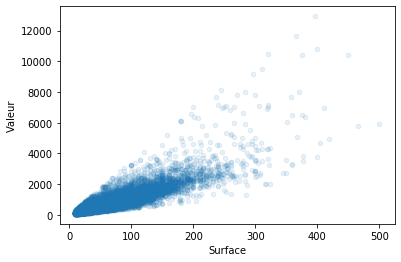

In [28]:
df = df[df['prixm2'] > 4.23]
df = df[df['prixm2'] < 35.2]

df.plot(x = 'Surface', y = 'Valeur', kind = 'scatter', alpha = .1)

# Couplage avec la base des données GPS

On souhaite obtenir les coordonnées GPS de tous les appartements présents dans la base.
Pour cela, nous avons trouvé une base de données qui répertorient toutes les adresses parisiennes et leur associe des coordonnées GPS.
Pour coupler les deux bases, nous utiliserons la variable id.
Ce code id est de la forme WWXXX_YYYY_ZZZZZ avec : 	
##### WW est le code département (75 ici)
##### XXX est le code commune (115 pour le 15ème arrondissement)
##### YYYY est le code voie (4903 pour l'avenue Jean Jaurès par exemple)
##### ZZZZ est le numéro (00005 pour le 5)


In [29]:
df2 = pd.read_csv('https://adresse.data.gouv.fr/data/ban/adresses/latest/csv/adresses-75.csv.gz', sep = ';').copy()

In [30]:
pd.set_option('display.max_columns', None)
df2.sample(5)

id  id_fantoir  numero  rep                nom_voie  \
129652  75113_4649_00105_bis  75113_4649     105  bis  Boulevard de l&#39;Hôpital   
86352       75117_7258_00013  75117_7258      13  NaN       Boulevard Pereire   
117349      75116_5939_00121  75116_5939     121  NaN      Avenue de Malakoff   
29370       75109_7359_00008  75109_7359       8  NaN            Rue Pétrelle   
18963       75105_1554_00005  75105_1554       5  NaN          Rue des Carmes   

        code_postal  code_insee               nom_commune  \
129652        75013       75113  Paris 13e Arrondissement   
86352         75017       75117  Paris 17e Arrondissement   
117349        75016       75116  Paris 16e Arrondissement   
29370         75009       75109   Paris 9e Arrondissement   
18963         75005       75105   Paris 5e Arrondissement   

        code_insee_ancienne_commune  nom_ancienne_commune          x  \
129652                          NaN                   NaN  653009.43   
86352                           NaN                   NaN  649567.53   
117349                          NaN                   NaN  647488.80   
29370                           NaN                   NaN  652225.37   
18963                           NaN                   NaN  652132.40   

                 y       lon        lat  alias  nom_ld libelle_acheminement  \
129652  6859830.16  2.359808  48.836809    NaN     NaN                PARIS   
86352   6865511.25  2.312245  48.887638    NaN     NaN                PARIS   
117349  6864001.57  2.284085  48.873896    NaN     NaN             PARIS 16   
29370   6864714.09  2.348578  48.880672    NaN     NaN                PARIS   
18963   6861214.37  2.347705  48.849193    NaN     NaN                PARIS   

                     nom_afnor source_position source_nom_voie  
129652  BOULEVARD DE L HOPITAL         commune         commune  
86352        BOULEVARD PEREIRE         commune         commune  
117349      AVENUE DE MALAKOFF         commune         commune  
29370             RUE PETRELLE         commune         commune  
18963           RUE DES CARMES         commune         commune

### Séléction des variables intéressantes

In [31]:
df_GPS = df2[[
        'id', 'x', 'y', 'lon', 'lat', 
        ]]

# x et y : Coordonnées cartographique en projection légale
# lon et lat : Coordonnées en WGS-84	

df_GPS.sample(10)

id          x           y       lon        lat
64640       75112_2086_00037  655166.00  6861167.81  2.389047  48.848992
26833       75109_2933_00007  651611.50  6863835.42  2.340308  48.872725
116493      75116_1790_00053  646037.69  6860544.07  2.264741  48.842683
15537       75106_8045_00088  650679.64  6860973.59  2.327937  48.846918
141918      75115_5568_00005  648318.35  6860550.35  2.295814  48.842927
3856    75101_7619_00002_bis  651802.36  6862283.20  2.343086  48.858780
40082       75108_9723_00003  649718.64  6864440.49  2.314432  48.878021
130319      75113_4754_00144  652865.29  6858276.71  2.358017  48.822828
97654       75118_1769_00063  652986.38  6866380.28  2.358770  48.895712
84501       75117_2700_00010  649456.22  6865342.94  2.310747  48.886116

### Couplage avec df

In [32]:
print(df.shape)
df = df.merge(df_GPS, left_on = 'id', right_on = 'id')
print(df.shape)

display(df.sample(10))

(29761, 11)
(29676, 15)


Date  Valeur  Numero TypeVoie               Voie  CodePostal  \
12504  17/10/2019  510.00    92.0      RUE         DE LOURMEL     75015.0   
16267  02/07/2019  976.32     1.0       AV      ALPHONSE XIII     75016.0   
18253  04/04/2019  325.00    14.0      RUE    DES DARDANELLES     75017.0   
17053  25/07/2019  830.50    10.0      RUE             MESNIL     75016.0   
14056  01/08/2019  577.70     4.0      RUE     ARMAND MOISANT     75015.0   
15040  29/01/2019  327.00    54.0      RUE    DE L ASSOMPTION     75016.0   
816    13/04/2019  412.50    48.0      RUE           DE BERRI     75008.0   
24214  28/10/2019  433.10    68.0       BD       ROCHECHOUART     75018.0   
11003  15/05/2019  171.20    15.0      RUE  POIRIER DE NARCAY     75014.0   
23213  07/06/2019  311.00    36.0      RUE              RAMEY     75018.0   

       Surface  NbPieces    TypeLocal     prixm2                id          x  \
12504     53.0       3.0  Appartement   9.622642  75115_5814_00092  647656.39   
16267    100.0       3.0  Appartement   9.763200  75116_0247_00001  647275.70   
18253     28.0       1.0  Appartement  11.607143  75117_2569_00014  647564.59   
17053     73.0       3.0  Appartement  11.376712  75116_6288_00010  647503.82   
14056     58.0       3.0  Appartement   9.960345  75115_0457_00004  649862.20   
15040     28.0       2.0  Appartement  11.678571  75116_0503_00054  646420.79   
816       60.0       3.0  Appartement   6.875000  75108_0904_00048  649252.63   
24214     38.0       2.0  Appartement  11.397368  75118_8288_00068  651894.86   
11003     16.0       0.0  Appartement  10.700000  75114_7556_00015  650374.55   
23213     30.0       2.0  Appartement  10.366667  75118_8014_00036  652062.13   

                y       lon        lat  
12504  6860730.88  2.286773  48.844497  
16267  6862040.18  2.281423  48.856240  
18253  6864997.89  2.284995  48.882862  
17053  6863384.97  2.284366  48.868352  
14056  6860525.44  2.316851  48.842825  
15040  6861867.37  2.269794  48.854616  
816    6864060.09  2.308124  48.874564  
24214  6864982.43  2.344041  48.883061  
11003  6858457.62  2.324073  48.824268  
23213  6865705.66  2.346241  48.889577

On peut donc maintenant représenter les appartements dans un plan de Paris.

In [70]:
fig = px.scatter(df, x = 'lon', y = 'lat',
              color = 'prixm2',  width = 800, height = 627, opacity = .4, template = 'simple_white', color_continuous_scale = ['rgb(255,255,0)', 'rgb(255,0,0)'])
fig.show()

On constate bien les faits stylisé déjà connu : 
#### Les quartiers périphériques sont en général moins chers que les quartiers centraux.
#### Les quartiers de l'ouest sont plus chers que ceux à l'est.

De plus, on remarque bien le tracé de la Seine, ainsi que l'emplacement du Champs de Mars, où il n'y a pas de logements

# BROUILLON
















In [ ]:
df['prixm2'] = df['Valeur']/df['Surface']

In [ ]:
df.sort_values('prixm2', ascending = False).head(30)

In [ ]:
import plotly.express as px

fig = px.scatter(df[df['prixm2']< .025], x='x', y='y',
              color='prixm2',size='prixm2', width = 800, height = 627, opacity = .1, template = 'simple_white')
fig.show()

In [ ]:
df.head()

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["Valeur", "CodePostal", "Surface", "x", "y"]

scatter_matrix(df.sample(1000)[attributes], figsize=(18, 10))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

dftest = df.sample(1000)[attributes]

axes = scatter_matrix(dftest, alpha=0.5, diagonal='kde', figsize=(16, 11))
corr = dftest.corr().values
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()


